In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
%qtconsole

In [186]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


/Users/cgu3/Library/Caches/pypoetry/virtualenvs/cgvae--TiOJ4U0-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [187]:
df = pd.read_json('results/results2.json', lines=True)
# df = pd.read_json('results/final_cora_results.json', lines=True)
# df = pd.read_json('results/final_citeseer_results.json', lines=True)
# round df['false_pos_edge_ratio'] to 1 decimal
df['false_pos_edge_ratio'] = df['false_pos_edge_ratio'].round(2)
df['split_ratio'] = df['split_ratio'].round(2)

In [195]:
df

,dataset,split_ratio,seed,best_epochs,val_best_loss,AUC,AP,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,add_input_edges_to_output,execution_time,time_stamp
0,Cora,0.33,40,998,0.5147,0.8084,0.8324,0.005,0,1,0.0,False,12.98,2024-11-30 18:06:56
1,Cora,0.33,40,998,0.5111,0.8032,0.8268,0.005,10,1,0.0,False,13.01,2024-11-30 18:07:13
2,Cora,0.33,40,978,0.5067,0.8194,0.8377,0.005,100,1,0.0,False,12.85,2024-11-30 18:07:29
3,Cora,0.33,40,991,0.5579,0.7606,0.8004,0.005,1000,1,0.0,False,12.91,2024-11-30 18:07:46
4,Cora,0.33,40,994,0.5348,0.7709,0.8100,0.005,10000,1,0.0,False,13.13,2024-11-30 18:08:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Cora,0.70,49,188,0.6566,0.6906,0.7374,0.005,10,1,0.5,False,5.01,2024-11-30 19:45:23
536,Cora,0.70,49,191,0.6558,0.6920,0.7324,0.005,100,1,0.5,False,5.07,2024-11-30 19:45:32
537,Cora,0.70,49,229,0.6501,0.6867,0.7254,0.005,1000,1,0.5,False,5.53,2024-11-30 19:45:41
538,Cora,0.70,49,788,0.6556,0.6674,0.6879,0.005,10000,1,0.5,False,12.23,2024-11-30 19:45:57


In [197]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'false_pos_edge_ratio', 'add_input_edges_to_output', 'regularization']).agg({'val_best_loss':['mean', 'std'], 'AUC': ['mean', 'std'], 'AP': ['mean', 'std'], 'execution_time': ['mean', 'std'], 'best_epochs': 'mean'})
# ungroup the index
df_agg = df_agg.reset_index()
# combine name use '_' if it has multiple levels
df_agg.columns = ['_'.join(col).strip('_') for col in df_agg.columns.values]

In [198]:
df_agg.sort_values(by=['split_ratio', 'false_pos_edge_ratio', 'regularization'], ascending=False)

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,val_best_loss_mean,val_best_loss_std,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean
53,Cora,0.70,0.50,False,100000,0.69234,0.000327,0.62510,0.017179,0.65995,0.016404,2.995,0.038658,18.3
52,Cora,0.70,0.50,False,10000,0.65368,0.008183,0.65276,0.013169,0.67621,0.012291,11.278,1.641312,753.1
51,Cora,0.70,0.50,False,1000,0.64536,0.013225,0.67112,0.018491,0.70518,0.021315,6.351,1.880003,294.4
50,Cora,0.70,0.50,False,100,0.64706,0.015767,0.67256,0.025992,0.70909,0.029358,6.301,2.759184,309.9
49,Cora,0.70,0.50,False,10,0.65232,0.008937,0.66407,0.017429,0.70037,0.021383,4.923,0.699381,175.9
48,Cora,0.70,0.50,False,0,0.65216,0.009138,0.66491,0.017773,0.70112,0.021840,4.917,0.695494,176.4
47,Cora,0.70,0.25,False,100000,0.69211,0.000314,0.65302,0.010563,0.69064,0.012921,2.893,0.052079,19.4
46,Cora,0.70,0.25,False,10000,0.62933,0.016786,0.70279,0.015267,0.72475,0.017799,10.343,1.842812,757.7
45,Cora,0.70,0.25,False,1000,0.60410,0.029626,0.74489,0.044412,0.77639,0.044378,9.069,3.102638,615.6
44,Cora,0.70,0.25,False,100,0.61556,0.025760,0.72856,0.036918,0.76495,0.038916,7.895,3.607604,521.7


In [203]:
# get best performance for each combination of dataset, split_ratio, false_pos_edge_ratio
df_best = df_agg.groupby(['dataset', 'split_ratio', 'false_pos_edge_ratio', 'add_input_edges_to_output']).apply(lambda x: x.loc[x['AUC_mean'].idxmax()])[['AUC_mean']]
# pivot to wider based on add_input_edges_to_output and rename the new columns to AUC_mean
df_best = df_best.pivot_table(index=['dataset', 'split_ratio', 'false_pos_edge_ratio'], columns='add_input_edges_to_output', values='AUC_mean')
# rename False to False_AUC_mean and True to True_AUC_mean
df_best = df_best.rename(columns={False: 'WR_AUC', True: 'WOR_AUC'})
df_best.columns.name = None
df_best

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_36511/3451250683.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_best = df_agg.groupby(['dataset', 'split_ratio', 'false_pos_edge_ratio', 'add_input_edges_to_output']).apply(lambda x: x.loc[x['AUC_mean'].idxmax()])[['AUC_mean']]


WR_AUC
dataset split_ratio false_pos_edge_ratio         
Cora    0.33        0.00                  0.81956
                    0.25                  0.74974
                    0.50                  0.67617
        0.50        0.00                  0.82905
                    0.25                  0.74644
                    0.50                  0.67774
        0.70        0.00                  0.88125
                    0.25                  0.74489
                    0.50                  0.67256

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



In [200]:
df_current = df[(df['seed'] == 43) & (df['split_ratio'] == split_ratio) & (df['false_pos_edge_ratio'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
df_current

,dataset,split_ratio,seed,best_epochs,val_best_loss,AUC,AP,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,add_input_edges_to_output,execution_time,time_stamp
210,Cora,0.7,43,156,0.6620,0.6389,0.6755,0.005,0,1,0.5,False,4.77,2024-11-30 18:46:29
211,Cora,0.7,43,156,0.6620,0.6387,0.6756,0.005,10,1,0.5,False,4.65,2024-11-30 18:46:38
212,Cora,0.7,43,159,0.6621,0.6401,0.6775,0.005,100,1,0.5,False,4.67,2024-11-30 18:46:46
213,Cora,0.7,43,216,0.6594,0.6457,0.6808,0.005,1000,1,0.5,False,5.38,2024-11-30 18:46:55
214,Cora,0.7,43,476,0.6674,0.6354,0.6634,0.005,10000,1,0.5,False,8.44,2024-11-30 18:47:07
215,Cora,0.7,43,18,0.6918,0.6005,0.6511,0.005,100000,1,0.5,False,2.96,2024-11-30 18:47:13


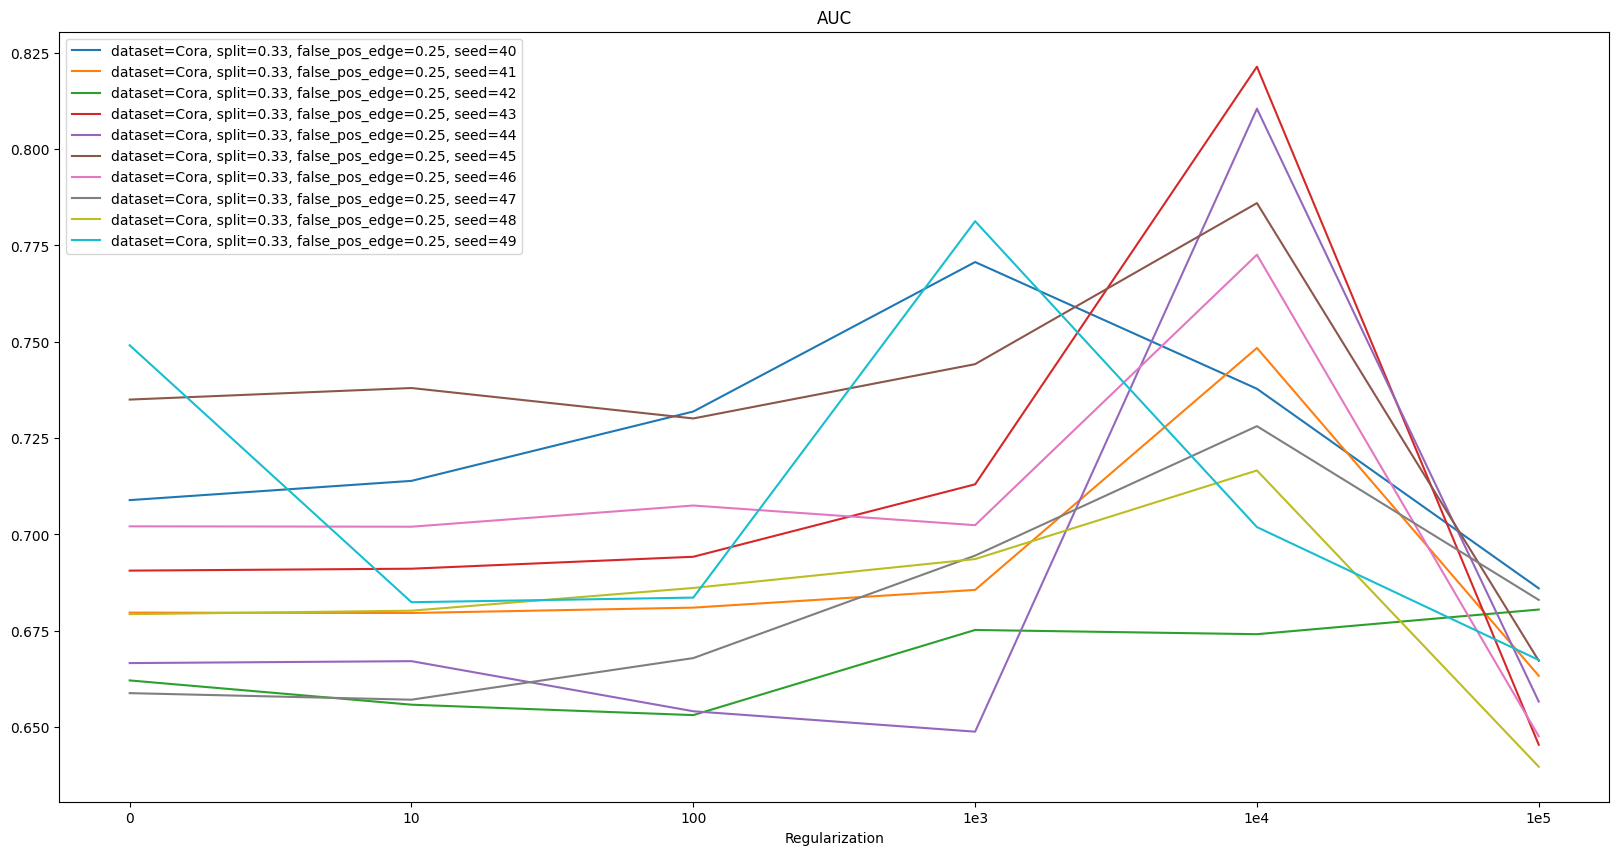

In [201]:
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique seeds
dataset = 'Cora'
split_ratio = 0.33
false_pos_edge_ratio = 0.25
seeds = df['seed'].unique()

# plot AUC
for seed in seeds:
    df_current = df[(df['seed'] == seed) & (df['split_ratio'] == split_ratio) & (df['false_pos_edge_ratio'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
    ax.plot([0, 1, 2, 3, 4, 5], df_current['AUC'],
               label=f'dataset={dataset}, split={split_ratio}, false_pos_edge={false_pos_edge_ratio}, seed={seed}')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax.set_xlabel('Regularization')
ax.set_title('AUC')
ax.legend()

In [202]:
df_agg[(df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,val_best_loss_mean,val_best_loss_std,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean
6,Cora,0.33,0.25,False,0,0.62762,0.035490,0.69322,0.030620,0.72991,0.033612,5.123,2.287070,251.7
7,Cora,0.33,0.25,False,10,0.63399,0.034236,0.68672,0.025715,0.72547,0.027159,4.416,1.009215,169.2
8,Cora,0.33,0.25,False,100,0.63412,0.034426,0.68895,0.027794,0.72982,0.025822,4.567,1.075113,172.2
9,Cora,0.33,0.25,False,1000,0.62594,0.037017,0.71093,0.042239,0.75543,0.036522,6.733,3.136909,393.7
10,Cora,0.33,0.25,False,10000,0.62320,0.033943,0.74974,0.047592,0.78121,0.048281,9.296,2.829414,714.6
11,Cora,0.33,0.25,False,100000,0.65914,0.013159,0.66367,0.016325,0.70409,0.015695,11.572,0.671810,978.8


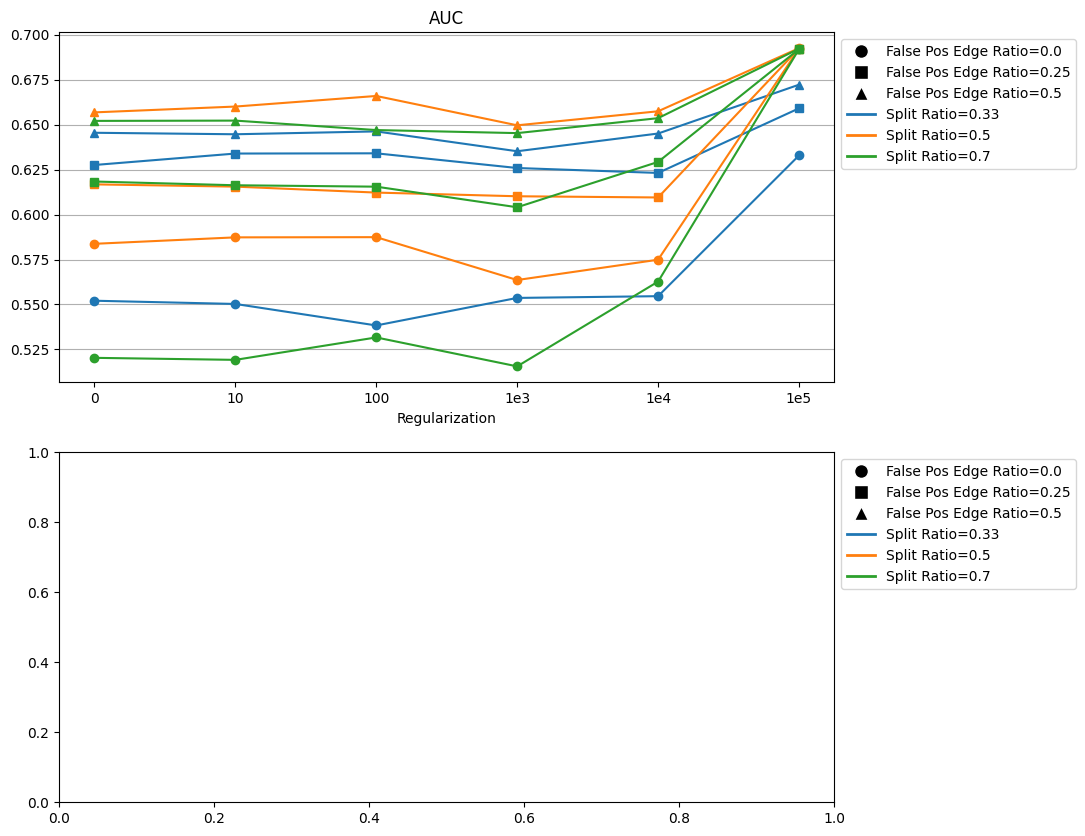

In [205]:
# plot for validation loss

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define a list of markers
markers = ['o', 's', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Create a color map
colors = list(mcolors.TABLEAU_COLORS.keys())
split_ratios = df_agg['split_ratio'].unique()
color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}

# Create a marker map
false_pos_edge_ratios = df_agg['false_pos_edge_ratio'].unique()
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# plot for different split_ratio and false_pos_edge_ratio
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]
        # plot AUC
        ax[0].plot([0, 1, 2, 3, 4, 5], df_current['val_best_loss_mean'],
                   label=f'split_ratio={split_ratio}, false_pos_edge_ratio={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        # add error bar
        ax[0].set_xticks([0, 1, 2, 3, 4, 5])
        ax[0].grid(axis='y')
        ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[0].set_xlabel('Regularization')
        ax[0].set_title('AUC')

# Create a custom legend
from matplotlib.lines import Line2D
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
ax[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# save above plot as a figure
fig.savefig('figures/pubmed_auc_ap.png', bbox_inches='tight', dpi=300)

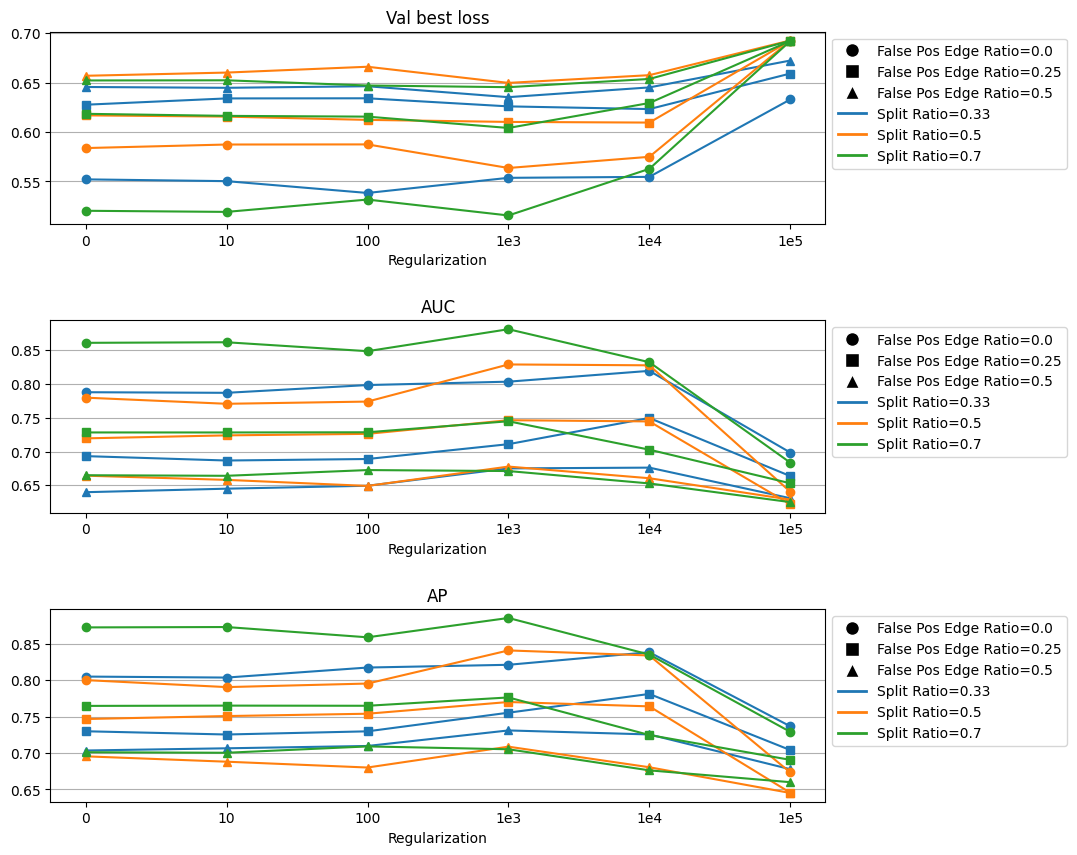

In [212]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Define markers and colors
markers = ['o', 's', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
colors = list(mcolors.TABLEAU_COLORS.keys())

split_ratios = df_agg['split_ratio'].unique()
false_pos_edge_ratios = df_agg['false_pos_edge_ratio'].unique()

color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# Plot for different split_ratio and false_pos_edge_ratio
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]

        for i, metric in enumerate(['val_best_loss_mean', 'AUC_mean', 'AP_mean']):
            ax[i].plot([0, 1, 2, 3, 4, 5], df_current[metric],
                       label=f'split_ratio={split_ratio}, false_pos_edge_ratio={false_pos_edge_ratio}',
                       marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
            ax[i].set_xticks([0, 1, 2, 3, 4, 5])
            ax[i].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
            ax[i].set_xlabel('Regularization')
            ax[i].grid(axis='y')

        ax[0].set_title('Val best loss')
        ax[1].set_title('AUC')
        ax[2].set_title('AP')

# Adjust space between plots
plt.subplots_adjust(hspace=0.5)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
for a in ax:
    a.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as a figure
fig.savefig('figures/pubmed_auc_ap.png', bbox_inches='tight', dpi=300)

In [172]:

df_agg_current = df_agg[(df_agg['dataset'] == dataset) & (df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]

# plot AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AUC']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['AUC']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('AUC')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

TypeError: 'Axes' object is not subscriptable

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')